<a href="https://colab.research.google.com/github/fogg-lab/tissue-model-analysis-tools/blob/packaging/notebooks/analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tissue Model Analysis Tools Capabilities Demo
**Length**: 15-20 minutes

## Description
This is a demo of the capabilities of the Tissue Model Analysis Tools (`tmat`) application. This notebook runs `fl_tissue_model_analysis_tools` on example data from the [tissue-model-analysis-tools-data](https://github.com/fogg-lab/tissue-model-analysis-tools-data) repository.

To run this notebook, you can either run the cells one-by-one or select Runtime -> Run All.

For instructions to install and use `tmat` on your own machine, see the [README.md](https://github.com/fogg-lab/tissue-model-analysis-tools/blob/main/README.md) file on GitHub.

## Install `tmat` into the Colab Runtime
**Expected runtime**: 5 minutes

In [1]:
try:
    import google.colab
    !apt -qq install -y pipx
    !pipx install git+https://github.com/fogg-lab/tissue-model-analysis-tools.git@packaging
    !ln -s /root/.local/bin/tmat /usr/bin/tmat
    !tmat configure /content/fl_tissue_model_tools
except ImportError:
    print("Not in Colab. See README.md for installation instructions if needed.")

The following additional packages will be installed:
  fonts-font-awesome fonts-lato javascript-common libjs-bootstrap4 libjs-lunr libjs-modernizr
  libjs-popper.js libjs-sizzle mkdocs node-jquery python-babel-localedata python3-argcomplete
  python3-babel python3-click python3-colorama python3-jinja2 python3-livereload python3-markdown
  python3-markupsafe python3-packaging python3-pip-whl python3-psutil python3-pygments
  python3-pyinotify python3-setuptools-whl python3-tornado python3-tz python3-userpath python3-venv
  python3-yaml python3.10-venv sphinx-rtd-theme-common
Suggested packages:
  apache2 | lighttpd | httpd libjs-es5-shim ghp-import mkdocs-doc nodejs python-jinja2-doc
  coffeescript node-less node-uglify python-livereload-doc python3-django python3-flask
  python3-slimmer python-markdown-doc python-psutil-doc python-pygments-doc ttf-bitstream-vera
  python-pyinotify-doc python3-pycurl python-tornado-doc python3-twisted
The following NEW packages will be installed:
  font

## Download example input data

**Expected runtime**: 2 minutes

In [2]:
!git clone https://github.com/fogg-lab/tissue-model-analysis-tools-data.git

Cloning into 'tissue-model-analysis-tools-data'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (259/259), 1.28 GiB | 14.78 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (250/250), done.


## Print `tmat` package usage with the `--help` (`-h`) flag

In [8]:
!tmat -h

Usage: tissue-model-analysis-tools [SUBCOMMAND] [OPTIONS]
Shorthand: tmat [SUBCOMMAND] [OPTIONS]

If no subcommand is given, the interactive mode will be used. For example, run: tmat

Available subcommands:
    configure: Set the location of the base directory for scripts and model training data.
    [SCRIPT_NAME]: Run a script from the scripts directory. Do not include the .py extension.

Get available options:
    -h, --help: Show this help message and exit.
    [SUBCOMMAND] -h: Show help (including available options) for a particular subcommand.

Examples:
    tmat configure -h
    tmat configure "C:\Users\Quinn\Desktop\some_folder_name"
    tmat compute_inv_depth -h
    tmat compute_zproj -v "C:\Users\Quinn\input_folder_name" "C:\Users\Quinn\out_folder_name"



## Z Projection

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_zproj.py

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [9]:
# Run the Z projection utility
!tmat compute_zproj /content/tissue-model-analysis-tools-data/zprojection_input /content/zproj_demo_out

usage: Usage: tissue-model-analysis-tools [SUBCOMMAND] [OPTIONS]
Shorthand: tmat [SUBCOMMAND] [OPTIONS]

If no subcommand is given, the interactive mode will be used. For example, run: tmat

Available subcommands:
    configure: Set the location of the base directory for scripts and model training data.
    [SCRIPT_NAME]: Run a script from the scripts directory. Do not include the .py extension.

Get available options:
    -h, --help: Show this help message and exit.
    [SUBCOMMAND] -h: Show help (including available options) for a particular subcommand.

Examples:
    tmat configure -h
    tmat configure "C:\Users\Quinn\Desktop\some_folder_name"
    tmat compute_inv_depth -h
    tmat compute_zproj -v "C:\Users\Quinn\input_folder_name" "C:\Users\Quinn\out_folder_name"
tmat: error: argument command: invalid choice: 'compute_zproj' (choose from 'configure')


### Output
Stored in /content/zproj_demo_out

Show the projections side-by-side:

In [ ]:
# NOTE: The code below is for displaying output in this demo notebook.
#       Code is not required for general use of the tmat application.

from matplotlib import pyplot as plt
from skimage import io
from glob import glob
import os

zprojection_paths = glob('/content/zproj_demo_out/*.tif')
zprojections = [io.imread(zp) for zp in zprojection_paths]

plt.figure(figsize=(16, 16))

for index, (zprojection, zp_path) in enumerate(zip(zprojections, zprojection_paths), start=1):
    plt.subplot(1, len(zprojections), index)
    plt.imshow(zprojection, cmap='gray')
    plt.axis('off')

    image_name = os.path.splitext(os.path.basename(zp_path))[0]
    plt.title(image_name)

plt.show()

<Figure size 1600x1600 with 0 Axes>

## Cell Coverage Area Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_cell_area.py

**Configuration:** /content/fl_tissue_model_tools/config/default_cell_area_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/zprojection_input

In [ ]:
# Run the cell area script
!tmat compute_cell_area --detect-well /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_cell_area.py --detect-well /content/tissue-model-analysis-tools-data/cell_coverage_area_input /content/cellarea_demo_out
2024-05-30 02:57:24.865790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 02:57:24.865841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 02:57:24.867060: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

[Verifying Input Directory]=========================================================================
Found 64 images in:
	/content/tissue-model-analysis-tools-data/cell

### Output

Stored in /content/cellarea_demo_out

*You can also load the .csv output with Pandas or a spreadsheet program like Excel.*

In [ ]:
!cat /content/cellarea_demo_out/calculations/cell_area.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

image_id             area_pct
B7_-1_1_1_ZProj_010  5.292168791413183
B1_-2_1_1_ZProj_001  5.9391415722983005
C2_-2_1_1_ZProj_004  11.512347013795788
C5_-1_1_1_ZProj_010  4.609286158731521
D2_-2_1_1_ZProj_007  8.651578882182855
B5_-1_1_1_ZProj_004  7.218420117241496
B6_-1_1_1_ZProj_001  8.728246885605222
B1_-2_1_1_ZProj_004  5.82004949836336
D3_-2_1_1_ZProj_010  3.8233286066908247
B7_-1_1_1_ZProj_004  11.458481915435557
C2_-2_1_1_ZProj_001  14.35917384909009
B8_-1_1_1_ZProj_010  4.281425401383632
D2_-2_1_1_ZProj_001  6.173504660643193
D2_-2_1_1_ZProj_004  7.592810446040302
C3_-2_1_1_ZProj_001  8.19760222494935
B1_-2_1_1_ZProj_007  7.344731796187411
B8_-1_1_1_ZProj_007  6.6701108219980725
C1_-2_1_1_ZProj_004  8.218646139086538
C1_-2_1_1_ZProj_001  10.573864497003008
C8_-1_1_1_ZProj_007  5.97117034938848
C7_-1_1_1_ZProj_010  5.234626556483754
C2_-2_1_1_ZProj_010  11.526091654484205
B6_-1_1_1_ZProj_007  4.953037586115742
B5_-1_1_1_ZProj_010  5.852674624226348
C6_-1_1_1_ZProj_001  9.3856715

## Invasion Depth Analysis

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_inv_depth.py

**Configuration:** /content/fl_tissue_model_tools/config/default_invasion_depth_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/invasion_depth_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/best_ensemble

In [ ]:
# Run the invasion depth script
!tmat compute_inv_depth /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_inv_depth.py /content/tissue-model-analysis-tools-data/invasion_depth_input /content/invasion_demo_out
2024-05-30 03:26:13.758591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 03:26:13.758640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 03:26:13.759986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

[Verifying Input Directory]=========================================================================
Z Stack ID                                                       No. Z Positions
inva

### Output

Full output is stored in /content/invasion_demo_out

*You can also load the .csv output with Pandas or a spreadsheet program like Excel.*

In [ ]:
!cat /content/invasion_demo_out/invasion_depth_predictions.csv | perl -pe 's/((?<=,)|(?<=^)),/ ,/g;' | column -t -s,

img_name                        inv_prob       inv_label
C1_02_2_1Z13_Texas Red_001.tif  0.003192806    0
C1_02_2_1Z12_Texas Red_001.tif  0.004143421    0
C1_02_2_1Z11_Texas Red_001.tif  0.0033635888   0
C1_02_2_1Z10_Texas Red_001.tif  0.002540876    0
C1_02_2_1Z9_Texas Red_001.tif   0.0017167042   0
C1_02_2_1Z8_Texas Red_001.tif   0.0011219132   0
C1_02_2_1Z7_Texas Red_001.tif   0.0007261213   0
C1_02_2_1Z6_Texas Red_001.tif   0.00080400263  0
C1_02_2_1Z5_Texas Red_001.tif   0.0015113048   0
C1_02_2_1Z4_Texas Red_001.tif   0.028950179    0
C1_02_2_1Z3_Texas Red_001.tif   0.9028016      1
C1_02_2_1Z2_Texas Red_001.tif   0.9993968      1
C1_02_2_1Z1_Texas Red_001.tif   0.99889207     1
C1_02_2_1Z0_Texas Red_001.tif   0.78110856     1


## Microvessel Formation Analysis

**Expected runtime**: 5-10 minutes

**Runs this script:** /content/fl_tissue_model_tools/scripts/compute_branches.py

**Configuration:** /content/fl_tissue_model_tools/config/default_branching_computation.json

**Input images:** /content/tissue-model-analysis-tools-data/branching_input

**Trained model data:** /content/fl_tissue_model_tools/model_training/binary_segmentation

In [ ]:
# Copy `n` images from the full set of demo input images into a smaller directory to run the analysis on
n = 10
# NOTE: The command below is specific to this demo. Advanced command-line knowledge is NOT needed to use the tool.
!cd /content/tissue-model-analysis-tools-data/branching_input && mkdir -p input_set && find . -maxdepth 1 -type f -iname "*.tif" | head -${n} | xargs -I '{}' cp '{}' input_set/

# Run the branching script:
!tmat compute_branches --detect-well /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out

Executing: /usr/bin/python3 /content/fl_tissue_model_tools/scripts/compute_branches.py --detect-well /content/tissue-model-analysis-tools-data/branching_input/input_set /content/branching_demo_out
2024-05-30 02:58:13.354315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 02:58:13.354365: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 02:58:13.355609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

Analyzing B1_001-1...
Applying mask to image...

Segmenting image...
100% 8/8 [00:27<00:00,  3.47s/it]

Computing graph and barcode...

Computing branch statistics...


### Output

Stored in /content/branching_demo_out

*You can also load the .csv output in Excel or any other spreadsheet program.*

#### 1. Show the .csv output

In [ ]:
# NOTE: The code below is specific to this demo notebook. As previously noted, you can also just use Excel.

import pandas as pd

csv_path = '/content/branching_demo_out/branching_analysis.csv'
df = pd.read_csv(csv_path, encoding='utf-16')
print(df.to_string(index=False))

     Image  Total # of branches  Total branch length (µm)  Average branch length (µm)
  B1_001-1                    7                236.099602                   33.728515
    F1_001                  150               8093.594101                   53.957294
    C8_005                   22                904.774635                   41.126120
C4_001 (1)                   44               2617.477006                   59.488114
    C1_006                   73               3926.266309                   53.784470
    A3_011                   32               1471.687314                   45.990229
    C4_006                   27               1394.683927                   51.654960
    A4_001                   33               1102.429534                   33.406956
    B4_001                   45               2444.424250                   54.320539
    C2_001                   25               1120.391999                   44.815680


#### 2. Show visualizations for 5 random images

*Samples with no branches are skipped.*

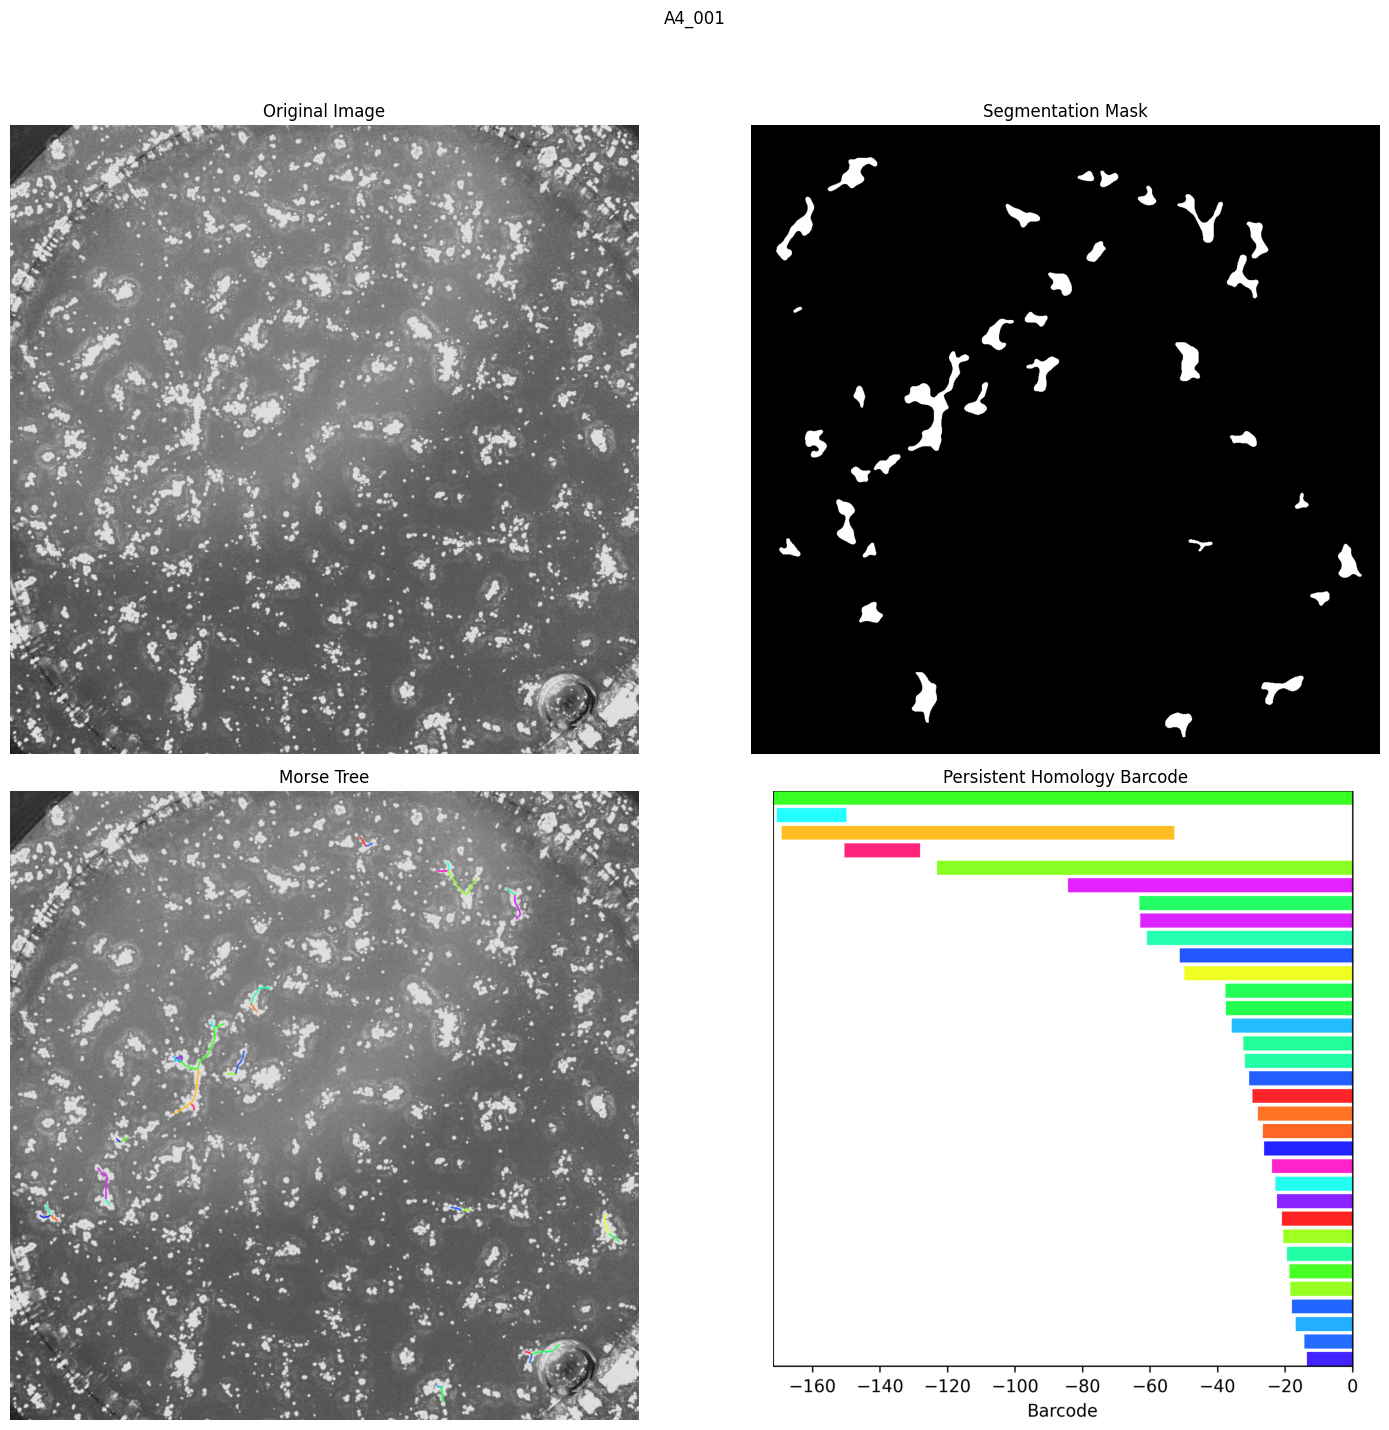

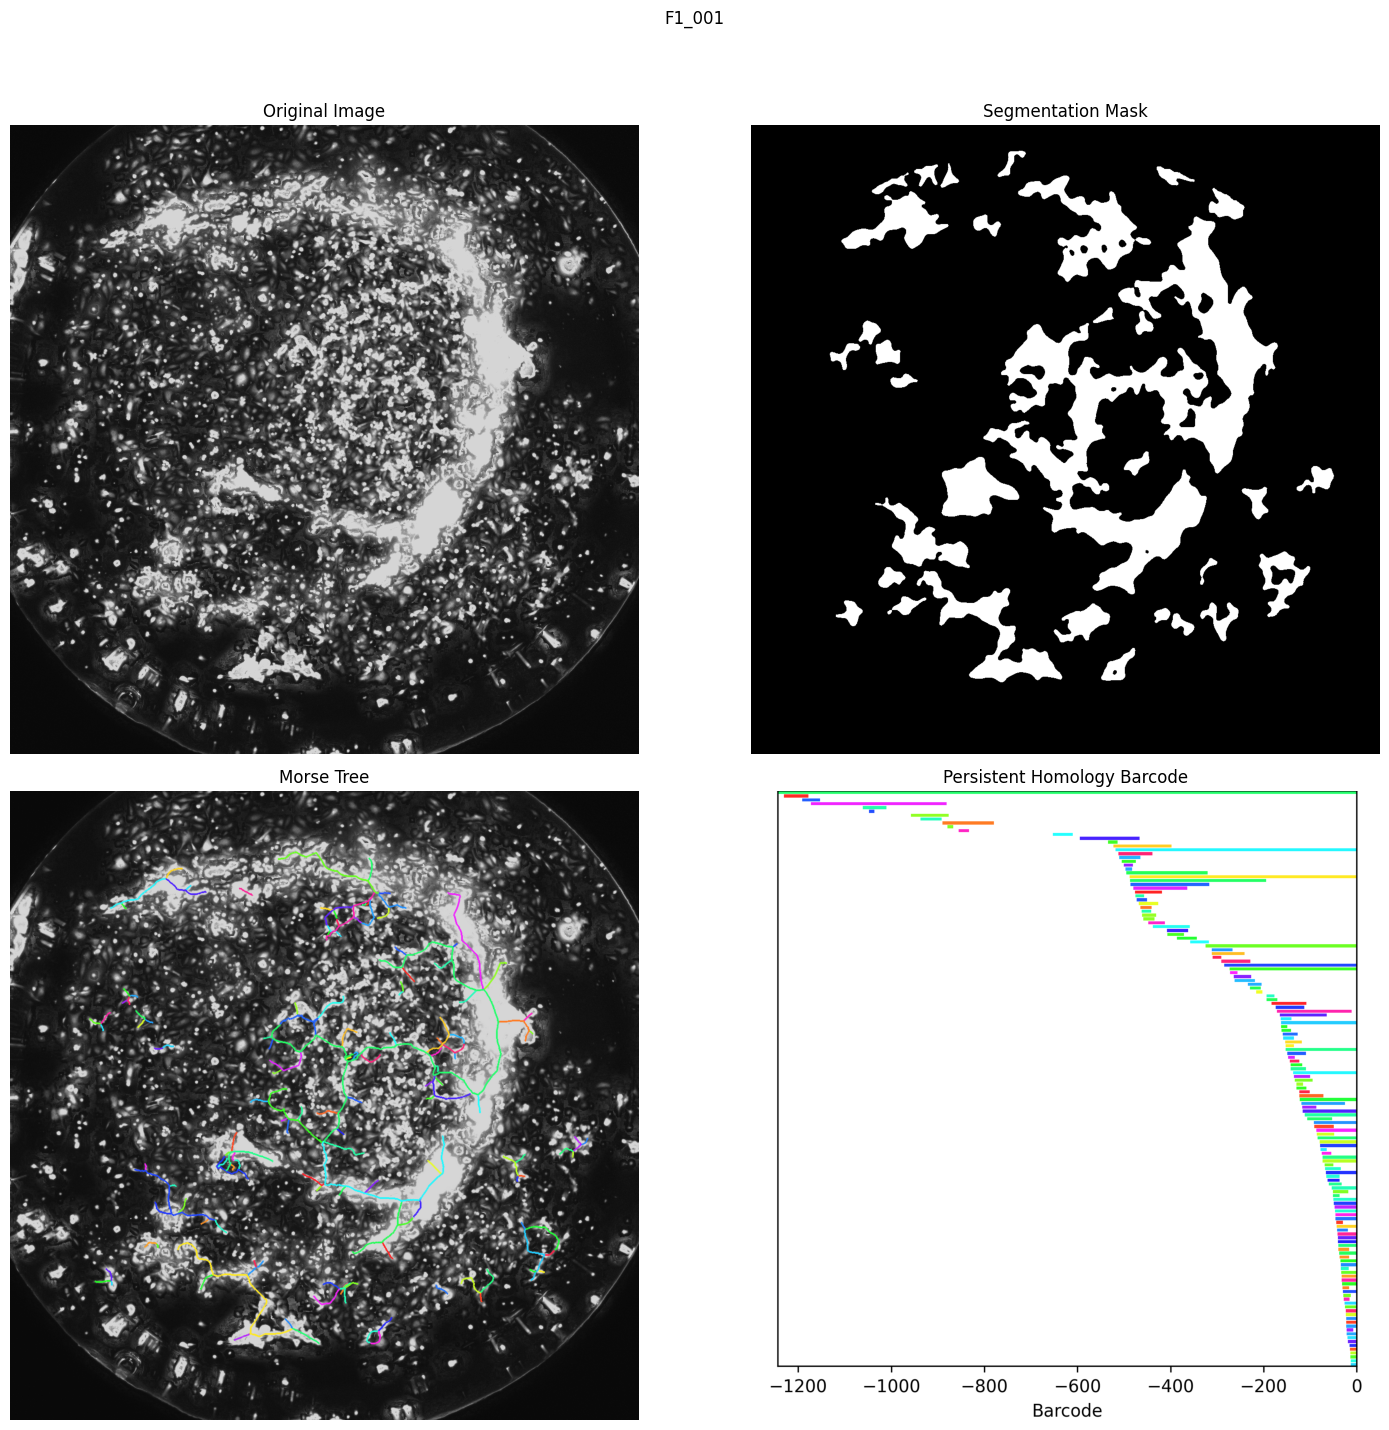

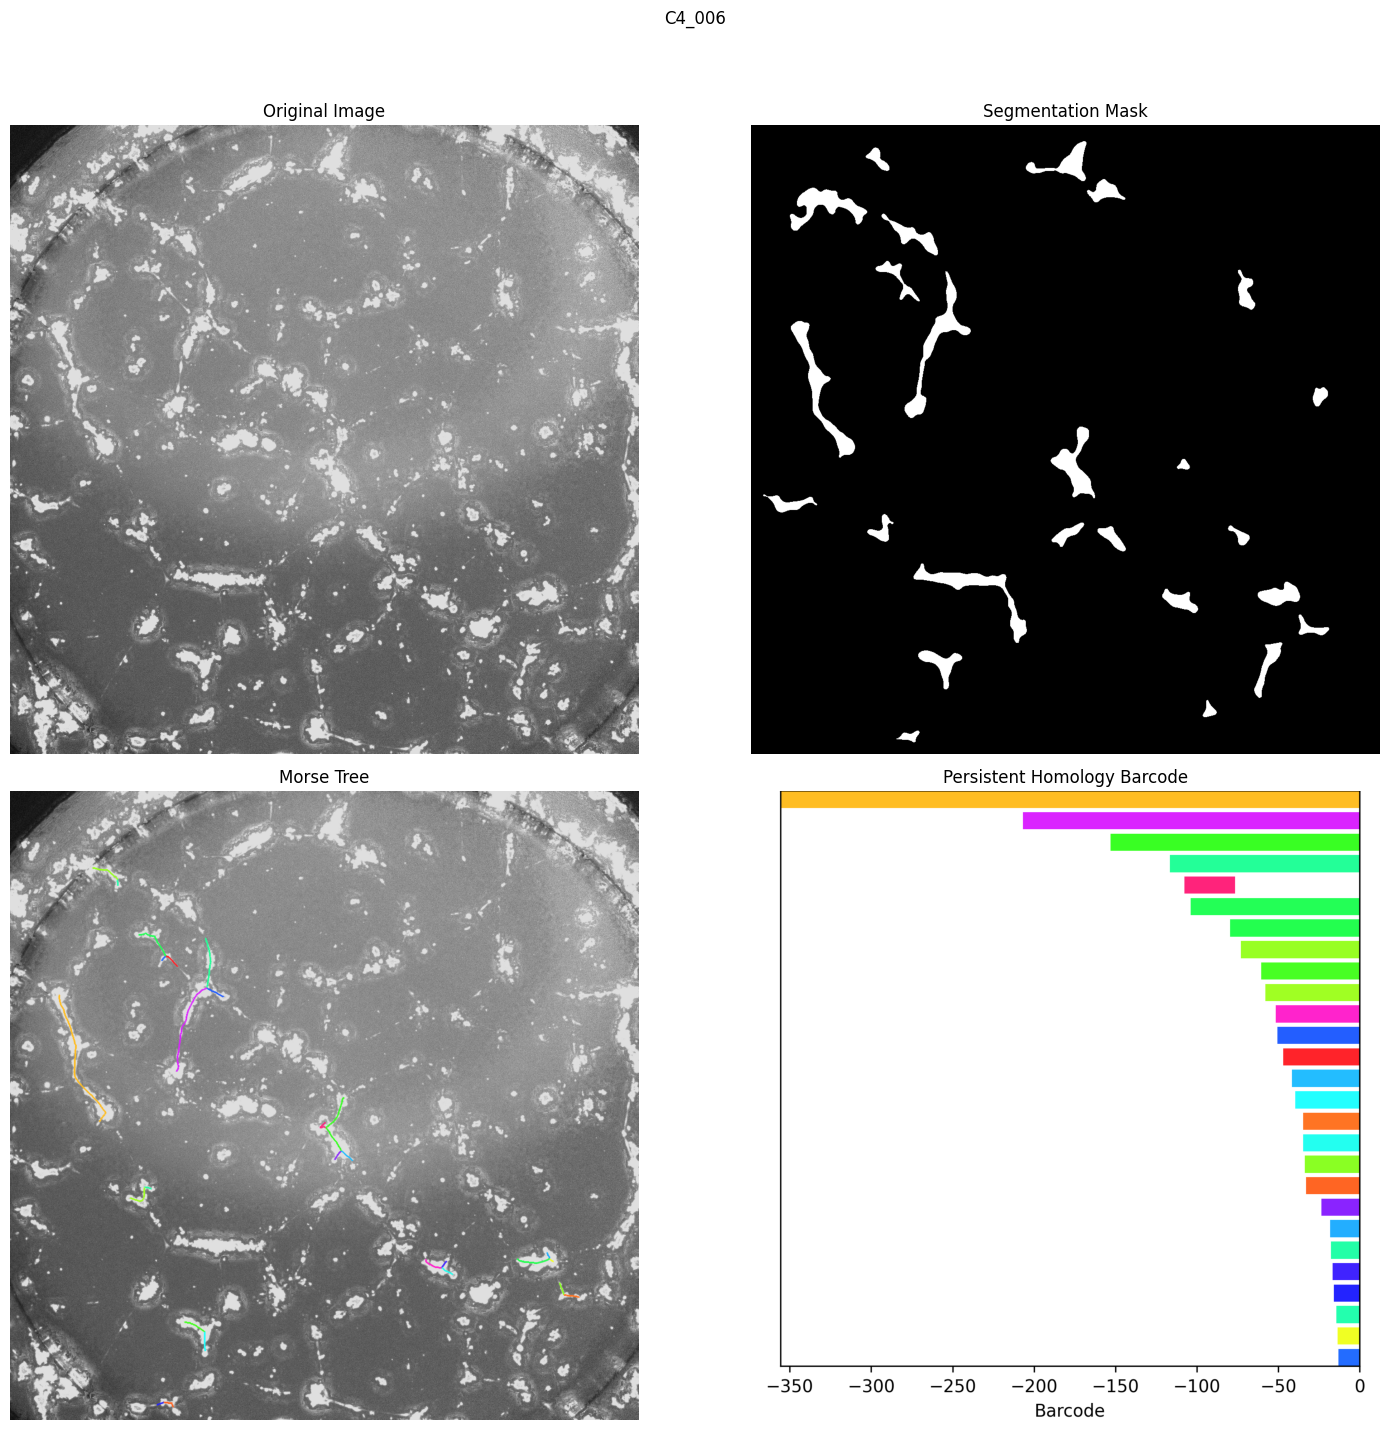

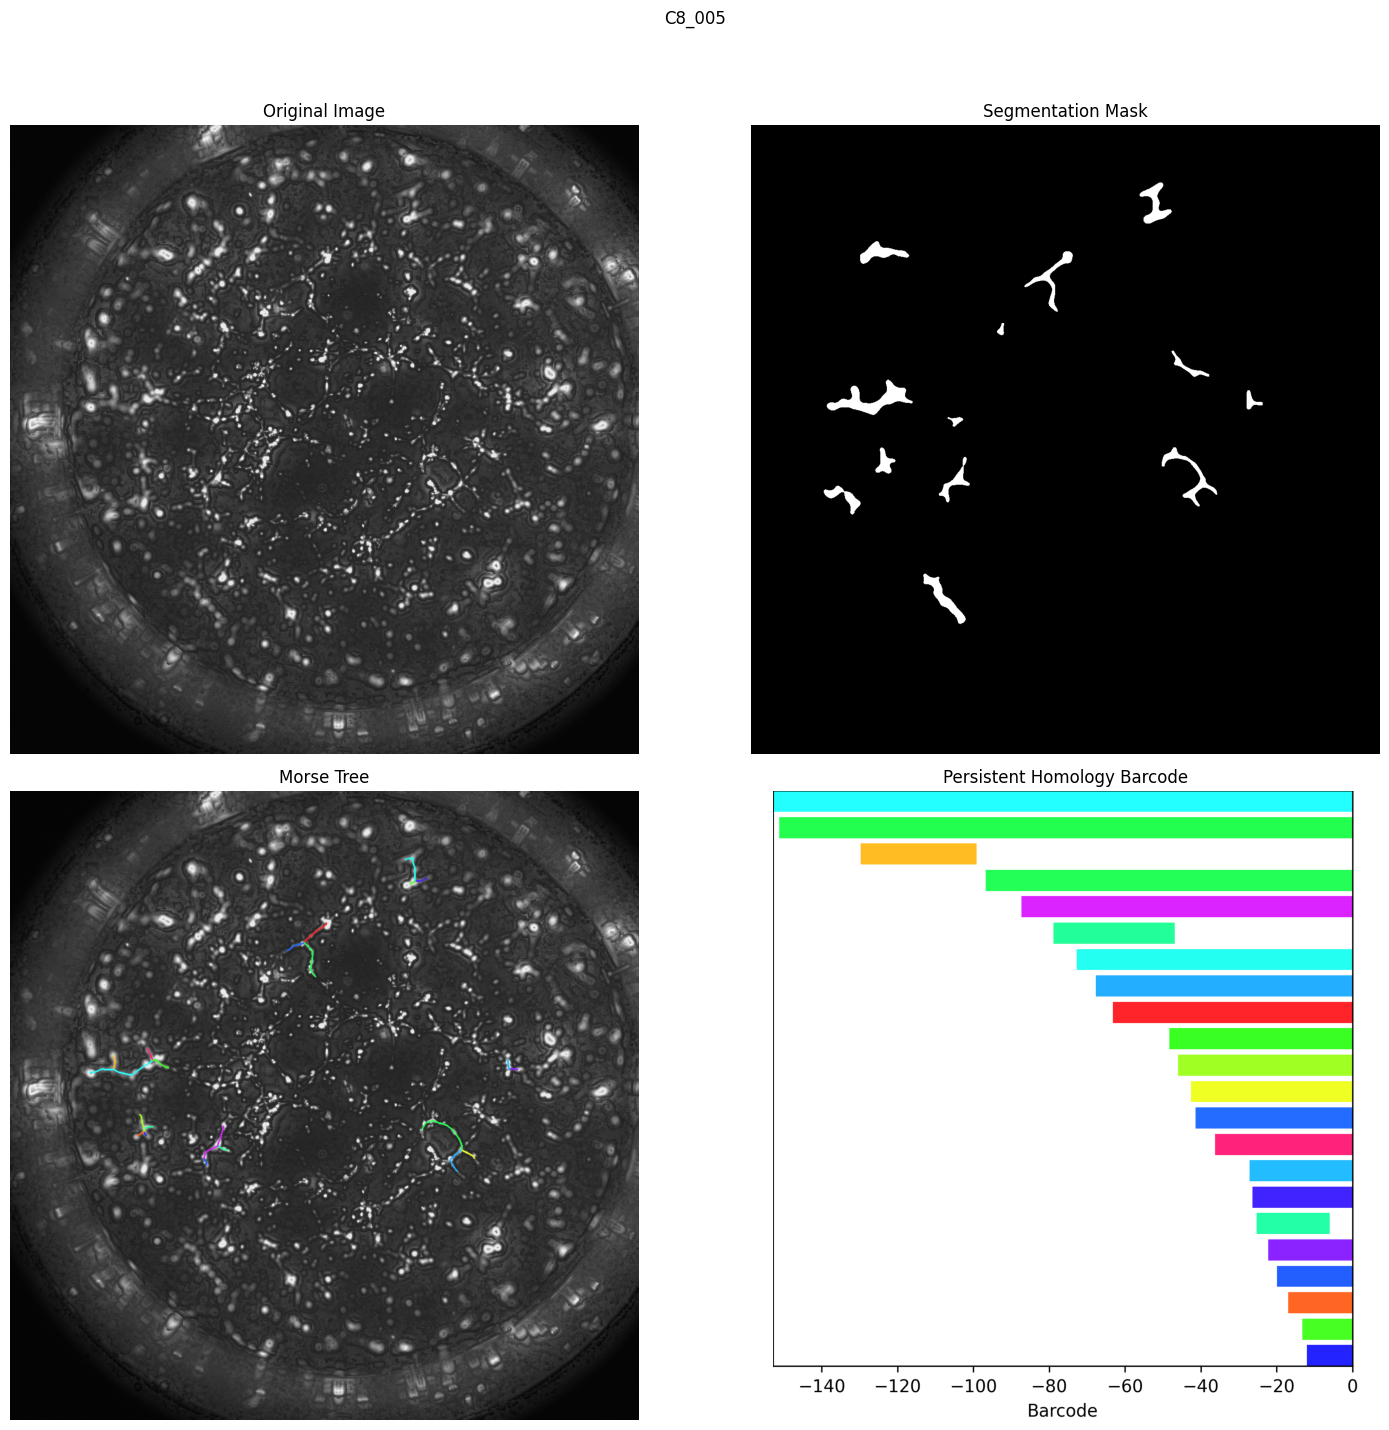

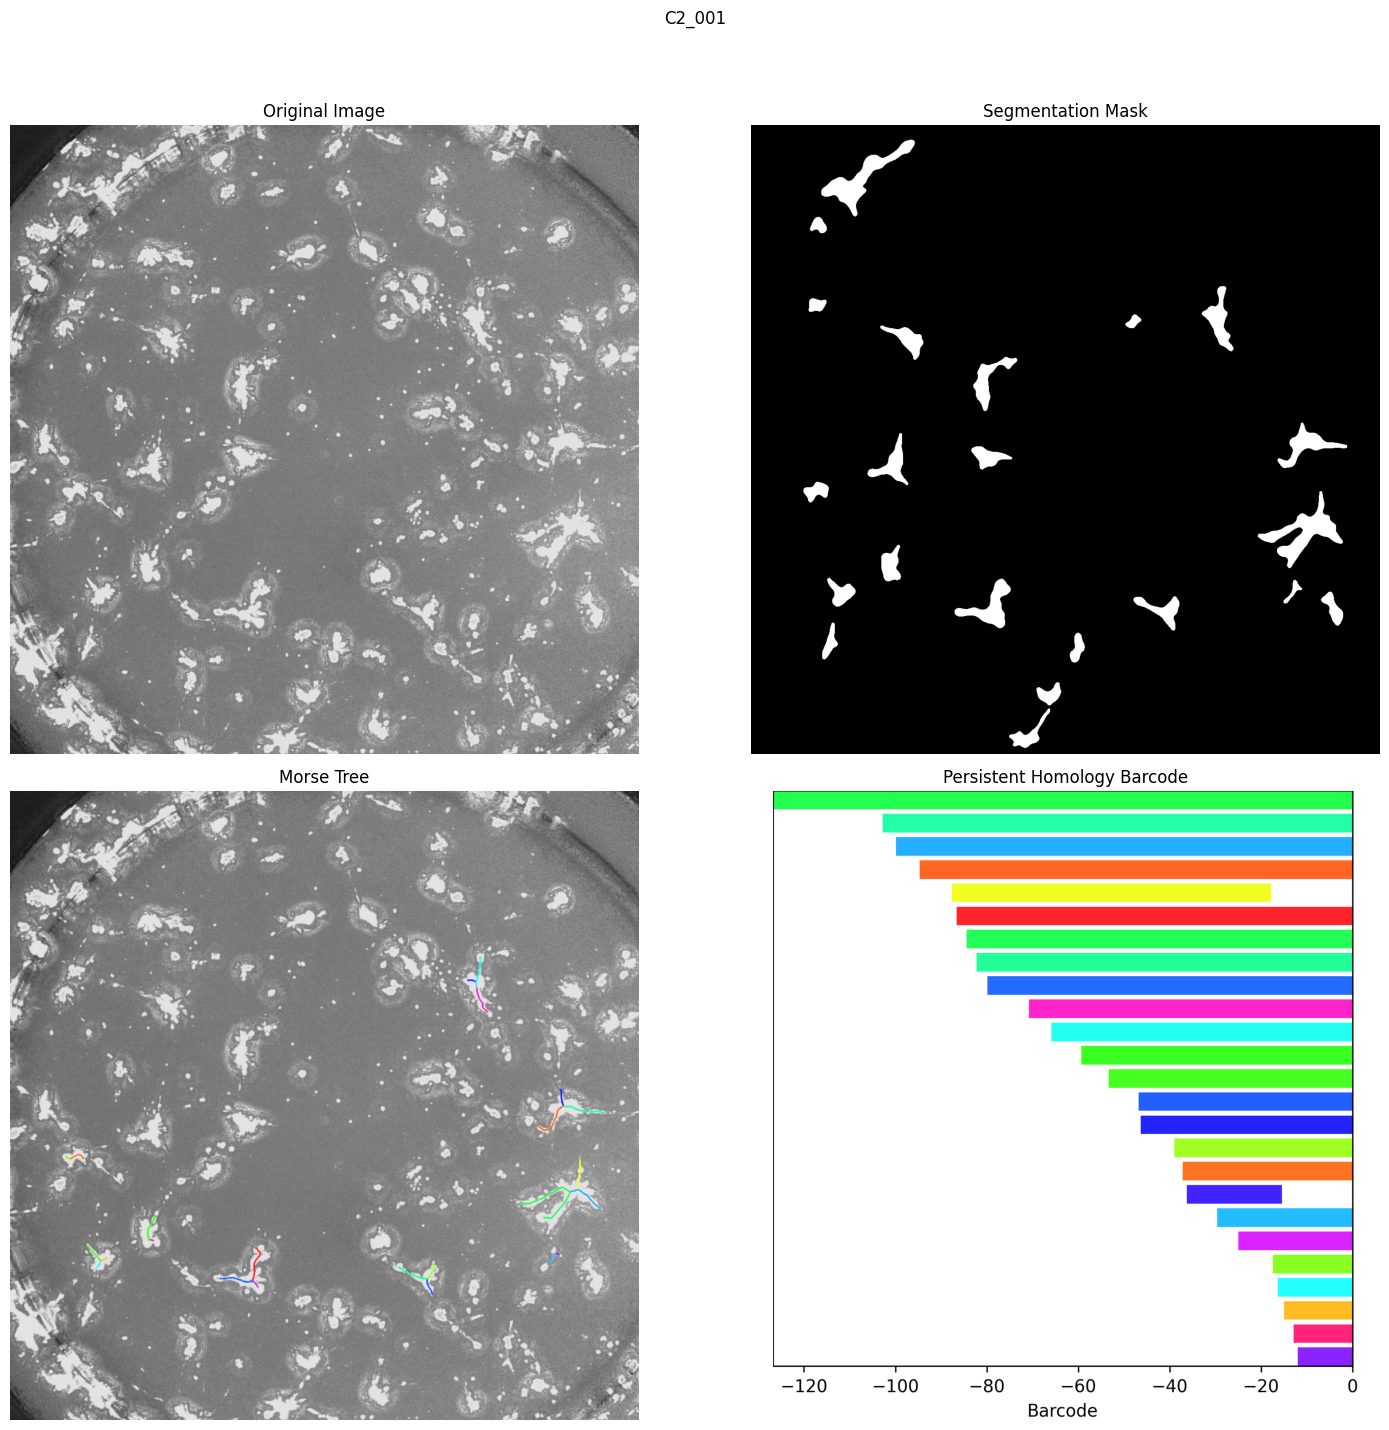

In [ ]:
# NOTE: The code below is specific to this demo notebook, not required for actual use of the tmat software package.

import os
import random
import pandas as pd
from glob import glob
from skimage import io
from matplotlib import pyplot as plt

# Show visualizations for 5 randomly sampled images. Samples with no branches are skipped

vis_dir = "/content/branching_demo_out/visualizations"
csv_path = "/content/branching_demo_out/branching_analysis.csv"

df = pd.read_csv(csv_path, encoding='utf-16')
filtered_df = df[df['Total # of branches'] > 0]

subdirs = [os.path.join(vis_dir, d) for d in filtered_df['Image'] if os.path.isdir(os.path.join(vis_dir, d))]
selected_subdirs = random.sample(subdirs, 5)

vis_filenames = ["original_image.png", "segmentation_mask.png", "morse_tree.png", "barcode.png"]
subplot_titles = ["Original Image", "Segmentation Mask", "Morse Tree", "Persistent Homology Barcode"]

for subdir in selected_subdirs:
    plt.figure(figsize=(15, 15))
    plt.suptitle(os.path.basename(subdir))

    for index, file_name in enumerate(vis_filenames, start=1):
        file_path = os.path.join(subdir, file_name)
        image = io.imread(file_path)

        plt.subplot(2, 2, index)
        plt.imshow(image, cmap='gray' if index != 4 else 'jet')
        plt.title(subplot_titles[index-1])
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()